In [ ]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

In [ ]:
def compute_energy(frame):
    return np.sum(frame ** 2)

In [ ]:
def compute_zero_crossing(frame):
    return np.sum(np.abs(np.diff(np.sign(frame)))) // 2

In [ ]:
def frame_signal(signal, frame_size, overlap_size, sample_rate):
    frame_length = int(frame_size * sample_rate)
    overlap_length = int(overlap_size * sample_rate)
    step_size = frame_length - overlap_length
    num_frames = (len(signal) - overlap_length) // step_size

    frames = np.zeros((num_frames, frame_length))
    for i in range(num_frames):
        start = i * step_size
        frames[i] = signal[start:start + frame_length]

    return frames

In [ ]:
def process_audio(file_path, frame_size, overlap_size):
    sample_rate, signal = wav.read(file_path)
    if signal.ndim > 1:  # If stereo, take only one channel
        signal = signal[:, 0]

    frames = frame_signal(signal, frame_size, overlap_size, sample_rate)

    energy_vector = np.array([compute_energy(frame) for frame in frames])
    zero_crossing_vector = np.array([compute_zero_crossing(frame) for frame in frames])

    return signal, frames, energy_vector, zero_crossing_vector, sample_rate

In [ ]:
def plot_results(signal, frames, energy_vector, zero_crossing_vector, sample_rate, frame_size, overlap_size):
    time_signal = np.arange(len(signal)) / sample_rate
    framed_signal = frames.flatten()
    time_framed_signal = np.arange(len(framed_signal)) / sample_rate

    time_frames = np.arange(len(energy_vector)) * (frame_size - overlap_size)

    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(time_signal, signal)
    plt.title('Original Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(time_framed_signal, framed_signal)
    plt.title('Framed Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.plot(time_frames, energy_vector, label='Energy')
    plt.plot(time_frames, zero_crossing_vector, label='Zero Crossing')
    plt.title('Energy and Zero Crossing')
    plt.xlabel('Frame Number')
    plt.ylabel('Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

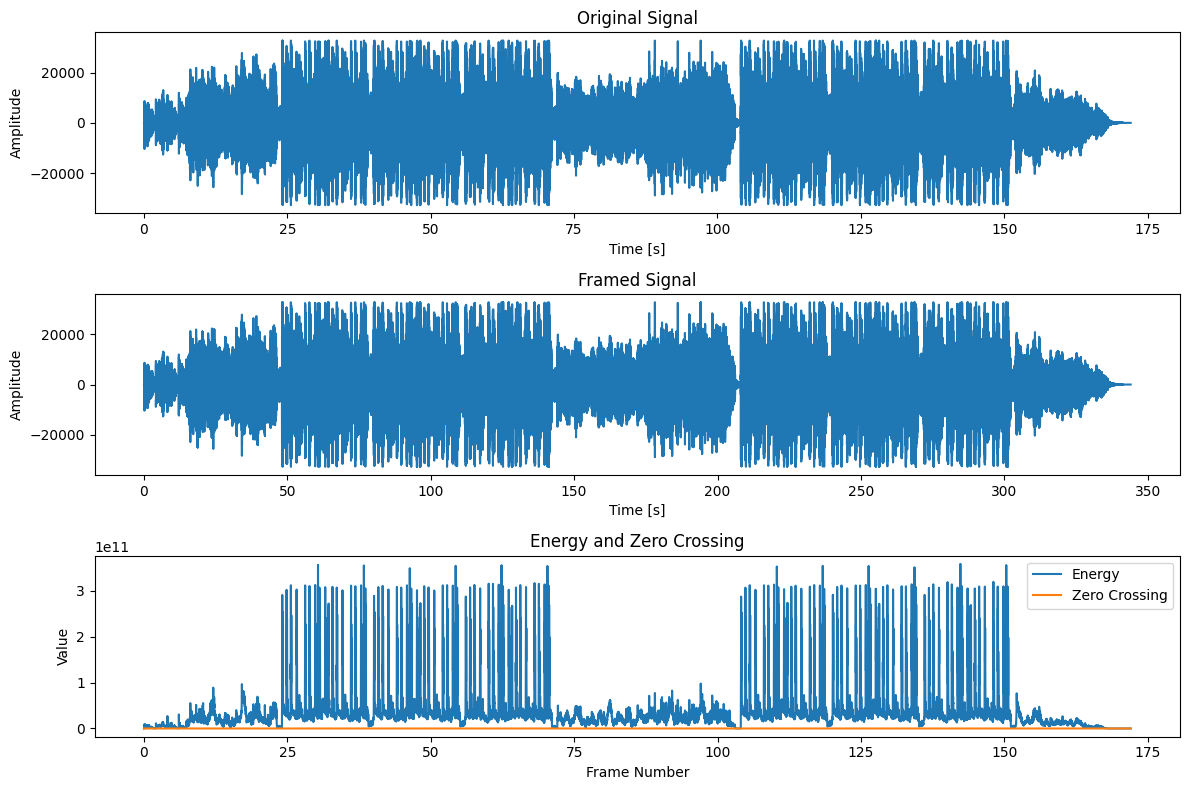

In [ ]:
if __name__ == "__main__":
    audio_file_path = "/content/Amorf - Malak.wav"
    frame_size = 0.02  # Frame size in seconds (e.g., 20ms)
    overlap_size = 0.01  # Overlap size in seconds (e.g., 10ms)

    signal, frames, energy_vector, zero_crossing_vector, sample_rate = process_audio(audio_file_path, frame_size, overlap_size)
    plot_results(signal, frames, energy_vector, zero_crossing_vector, sample_rate, frame_size, overlap_size)

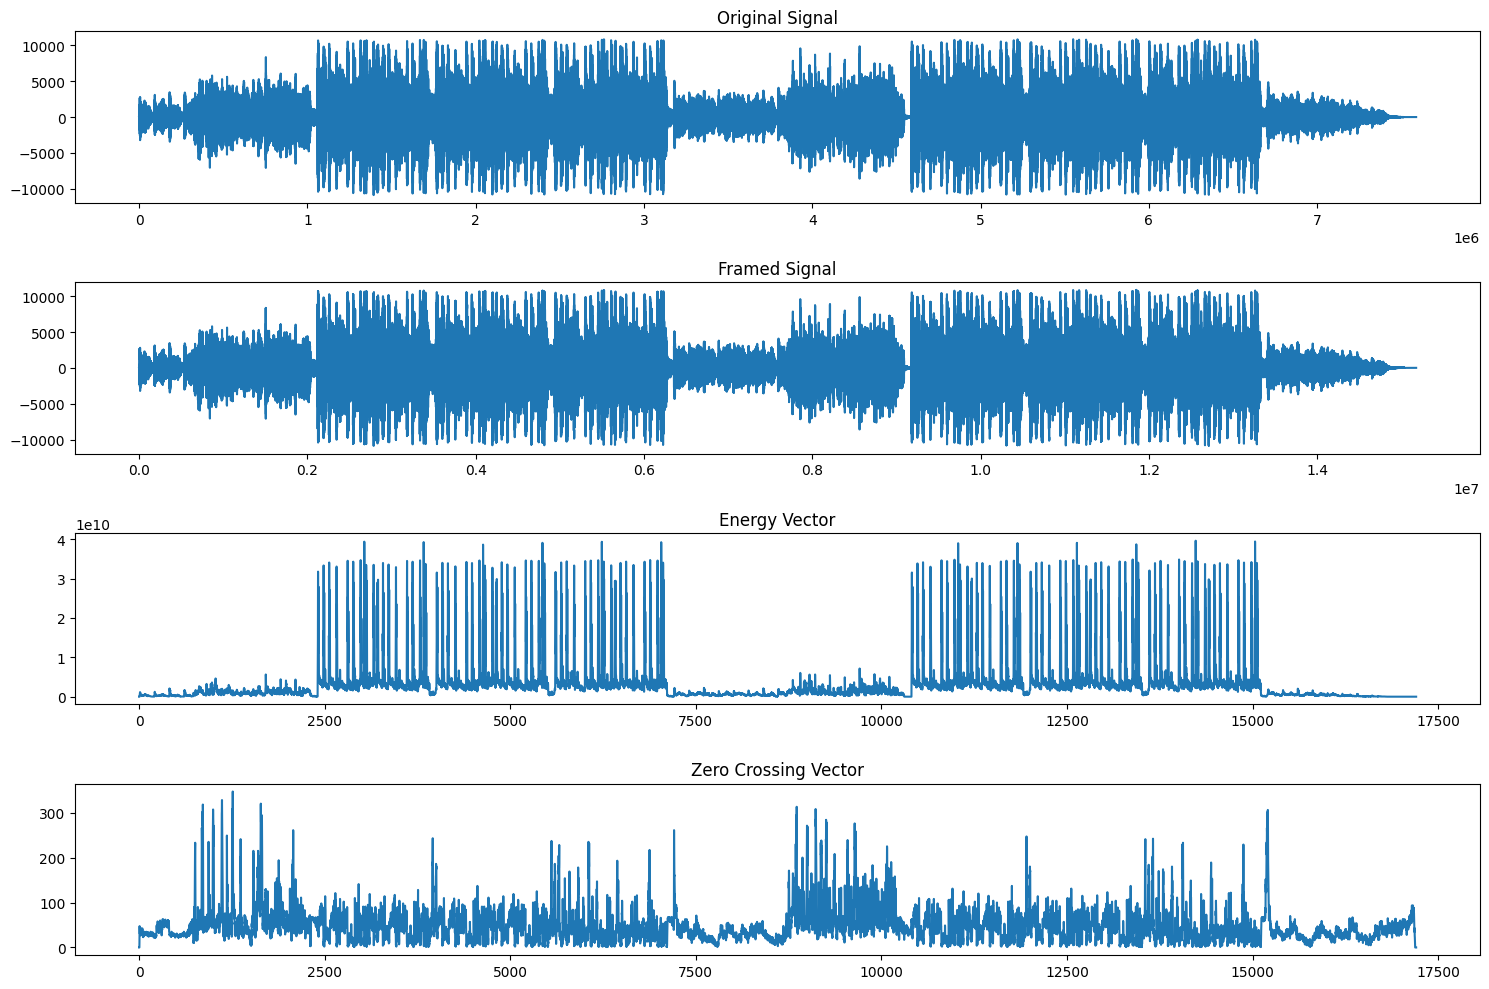

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

def frame_signal(signal, frame_size, overlap_size, sample_rate):
    frame_length = int(frame_size * sample_rate)
    overlap_length = int(overlap_size * sample_rate)
    step = frame_length - overlap_length
    signal_length = len(signal)

    # Number of frames
    num_frames = int(np.ceil(float(np.abs(signal_length - overlap_length)) / step))

    # Pad signal to make sure all frames have equal number of samples without truncating any samples from the original signal
    pad_signal_length = num_frames * step + overlap_length
    z = np.zeros((pad_signal_length - signal_length))
    pad_signal = np.append(signal, z)

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * step, step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]

    return frames

def compute_energy(frames):
    return np.sum(frames ** 2, axis=1)

def compute_zero_crossing(frames):
    zero_crossings = np.sum(np.abs(np.diff(np.sign(frames))), axis=1) / 2
    return zero_crossings

def main(audio_file_path, frame_size, overlap_size):
    # Load audio file
    sample_rate, signal = wav.read(audio_file_path)
    if signal.ndim == 2:  # If stereo, convert to mono
        signal = np.mean(signal, axis=1)

    # Frame the signal
    frames = frame_signal(signal, frame_size, overlap_size, sample_rate)

    # Compute energy and zero crossing rate for each frame
    energy_vector = compute_energy(frames)
    zero_crossing_vector = compute_zero_crossing(frames)

    # Construct the framed signal for plotting
    framed_signal = frames.flatten()

    # Plotting
    plt.figure(figsize=(15, 10))

    plt.subplot(4, 1, 1)
    plt.plot(signal)
    plt.title('Original Signal')

    plt.subplot(4, 1, 2)
    plt.plot(framed_signal)
    plt.title('Framed Signal')

    plt.subplot(4, 1, 3)
    plt.plot(energy_vector)
    plt.title('Energy Vector')

    plt.subplot(4, 1, 4)
    plt.plot(zero_crossing_vector)
    plt.title('Zero Crossing Vector')

    plt.tight_layout()
    plt.show()

# Example usage
audio_file_path = '/content/Malak.wav'
frame_size = 0.02  # Frame size in seconds
overlap_size = 0.01  # Overlap size in seconds

main(audio_file_path, frame_size, overlap_size)
